In [27]:
def succession(endYr, fireChance):
    from random import randint
    import matplotlib.pyplot as plt
    import numpy as np
    gap = [.25]         # defining variables, setting starting values
    bare = [.25]
    oxalis = [.25]
    rubis = [.25]
    fireChanceInt = fireChance * 100
    i = 1               # creating time variable
    while i <= endYr:
        newGap = gap[-1] + .018*oxalis[-1] + .018*rubis[-1] - .067*gap[-1]          # defining change rates for variables
        newBare = bare[-1] + .067*gap[-1] - .015*bare[-1]
        newOxalis = oxalis[-1] + .015*bare[-1] - .018*oxalis[-1] - .05*oxalis[-1]
        newRubis = rubis[-1] + .05*oxalis[-1] - .018*rubis[-1]

        gap.append(round(newGap, 10))        # adding new values to original variable list
        bare.append(round(newBare,10))
        oxalis.append(round(newOxalis,10))
        rubis.append(round(newRubis,10))

        diceRoll = randint(1,100)
        if diceRoll <= fireChanceInt:
            gap[-1] = gap[-1] + (1-.66)*bare[-1] + .5*oxalis[-1] + .5*rubis[-1]
            bare[-1] = .66*bare[-1]
            oxalis[-1] = .5*oxalis[-1]
            rubis[-1] = .5*rubis[-1]

        i = i + 1
        #for Yr in fireYr:       # forest fire dynamics
        #    if i == Yr:
        #        gap[-1] = gap[-1] + (1-.66)*bare[-1] + .5*oxalis[-1] + .5*rubis[-1]
        #        bare[-1] = .66*bare[-1]
        #        oxalis[-1] = .5*oxalis[-1]
        #        rubis[-1] = .5*rubis[-1]

    print("Percent gap: " + str(gap[-1]))       # printing summary statistics
    print("Percent bare: " + str(bare[-1]))
    print("Percent oxalis: " + str(oxalis[-1]))
    print("Percent rubis: " + str(rubis[-1]))

    gapArray = np.array(gap)        # converting lists to arrays for plotting
    bareArray = np.array(bare)
    oxalisArray = np.array(oxalis)
    rubisArray = np.array(rubis)

    plt.plot(range(1,endYr+2), gapArray, label="Gap")       # plotting data
    plt.plot(range(1,endYr+2), bareArray, label="Bare")
    plt.plot(range(1,endYr+2), oxalisArray, label="Oxalis")
    plt.plot(range(1,endYr+2), rubisArray, label="Rubis")
    plt.title("Forest floor cover")
    plt.xlabel("Time (years)")
    plt.ylabel("Ground cover (%)")
    plt.legend()        # there is some kind of error with showing the plot. Idk what it is...
    plt.show()

Percent gap: 0.0993608397
Percent bare: 0.5645038715
Percent oxalis: 0.1218340634
Percent rubis: 0.2143012261


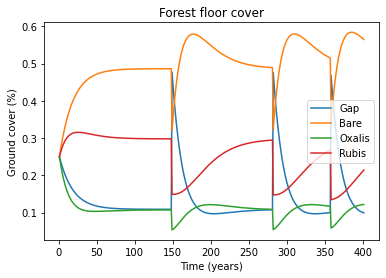

In [43]:
succession(400, .01)